# Preliminary_Statistics

In [19]:
%matplotlib inline


import os
import time
import sqlite3
import bz2
import requests
import xml.dom.minidom
import seaborn as sns
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import plotly as ply
import pickle
import matplotlib.pyplot as plt
import bqplot.pyplot as bplt
import warnings
import ipywidgets
import h5py
import yellowbrick as yb
import sklearn

from yellowbrick.model_selection import CVScores
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_blobs
from time import sleep
from scipy.stats import norm
from ipywidgets import FloatSlider, Select, HBox, VBox, Layout, Button, HTML
from bqplot import *
from bqplot.interacts import *
from bqplot.colorschemes import *
from bqplot import LinearScale
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing.data import QuantileTransformer
from sklearn import model_selection

ply.offline.init_notebook_mode()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = None

# Desired Cleaning Framework

In [4]:
df = pd.read_csv('car_data_clean_complete_v5_ext.csv')

In [ ]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

In [ ]:
#Label encoder if needed

labels = ['make', 'model', 'trim', 'interior_color', 'exterior_color', 'zip', 'fuel_type', 
          'States_Short', 'stock_no', 'vehicle_type', 'body_type', 'drivetrain', 'engine', 'transmission', 'primary_city',
         'county', 'timezone', 'Regions_Quads', 'Regions_Census', 'Regions_Economic', 'Sun_Belt', 'Frost_Belt', 'Rust_Belt']
les = {}

for l in labels:
    les[l] = LabelEncoder()
    les[l].fit(df[l].astype(str))
    tr = les[l].transform(df[l].astype(str))
    
    df.loc[:, l + '_feat'] = pd.Series(tr, index=df.index)

labeled = df[['price','miles','year', 'cylinders','msrp','is_certified','engine_size',
              'AGE','Population', 'doors', 'dom', 'dom_180', 'dom_active', 'irs_estimated_population_2015',
              'Median_Household_income_num','Number_of_households', 'Median_Family_income_num', 'Per_Capita_income_Num',] 
                    + [x+"_feat" for x in labels]]

# Radviz - Visualization(s)

In [5]:
df['is_newer'] = np.where(df['AGE']<10,1,0)
#feature_df['is_newer'] = np.where(feature_df['AGE']<10,1,0)

In [9]:
df = df.select_dtypes(include = ['float64', 'int64','int32'])

<IPython.core.display.Javascript object>


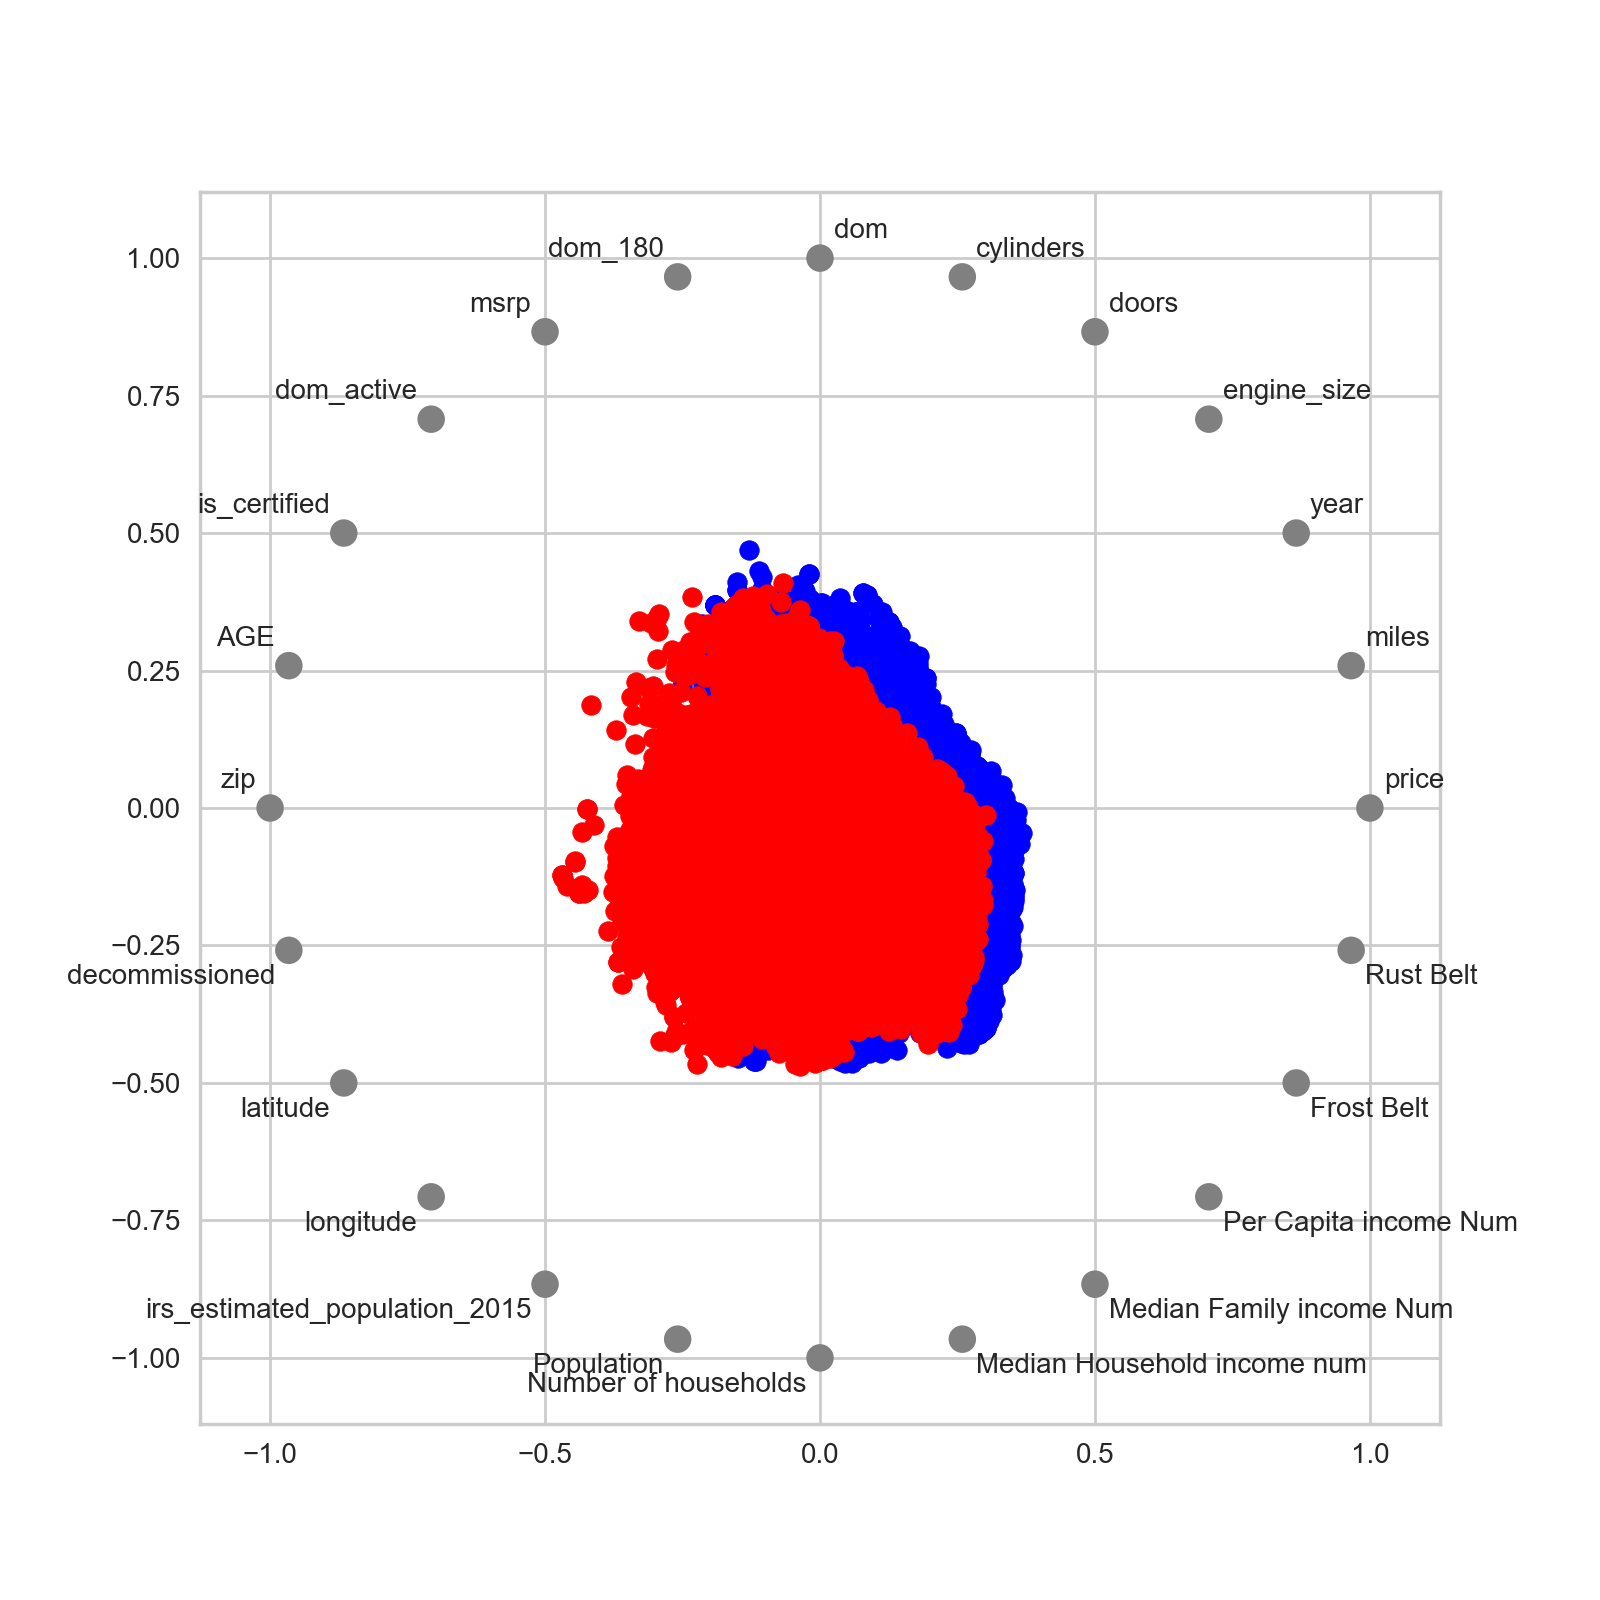

In [10]:
from pandas.plotting import radviz
plt.figure(figsize=(8,8))
radviz(df, 'is_newer',color=['blue','red'])
plt.show()

# Visualization(s)

## Different level of household income - Make

In [3]:
feature_df = pd.read_csv('car_data_clean_complete_v5_ext.csv')

In [4]:
lowincome = feature_df[feature_df['Number of households']<400000]
middleincome = feature_df[(feature_df['Number of households']>=400000)|(feature_df['Number of households']<1000000)]
highincome =feature_df[feature_df['Number of households']>=1000000]

<IPython.core.display.Javascript object>


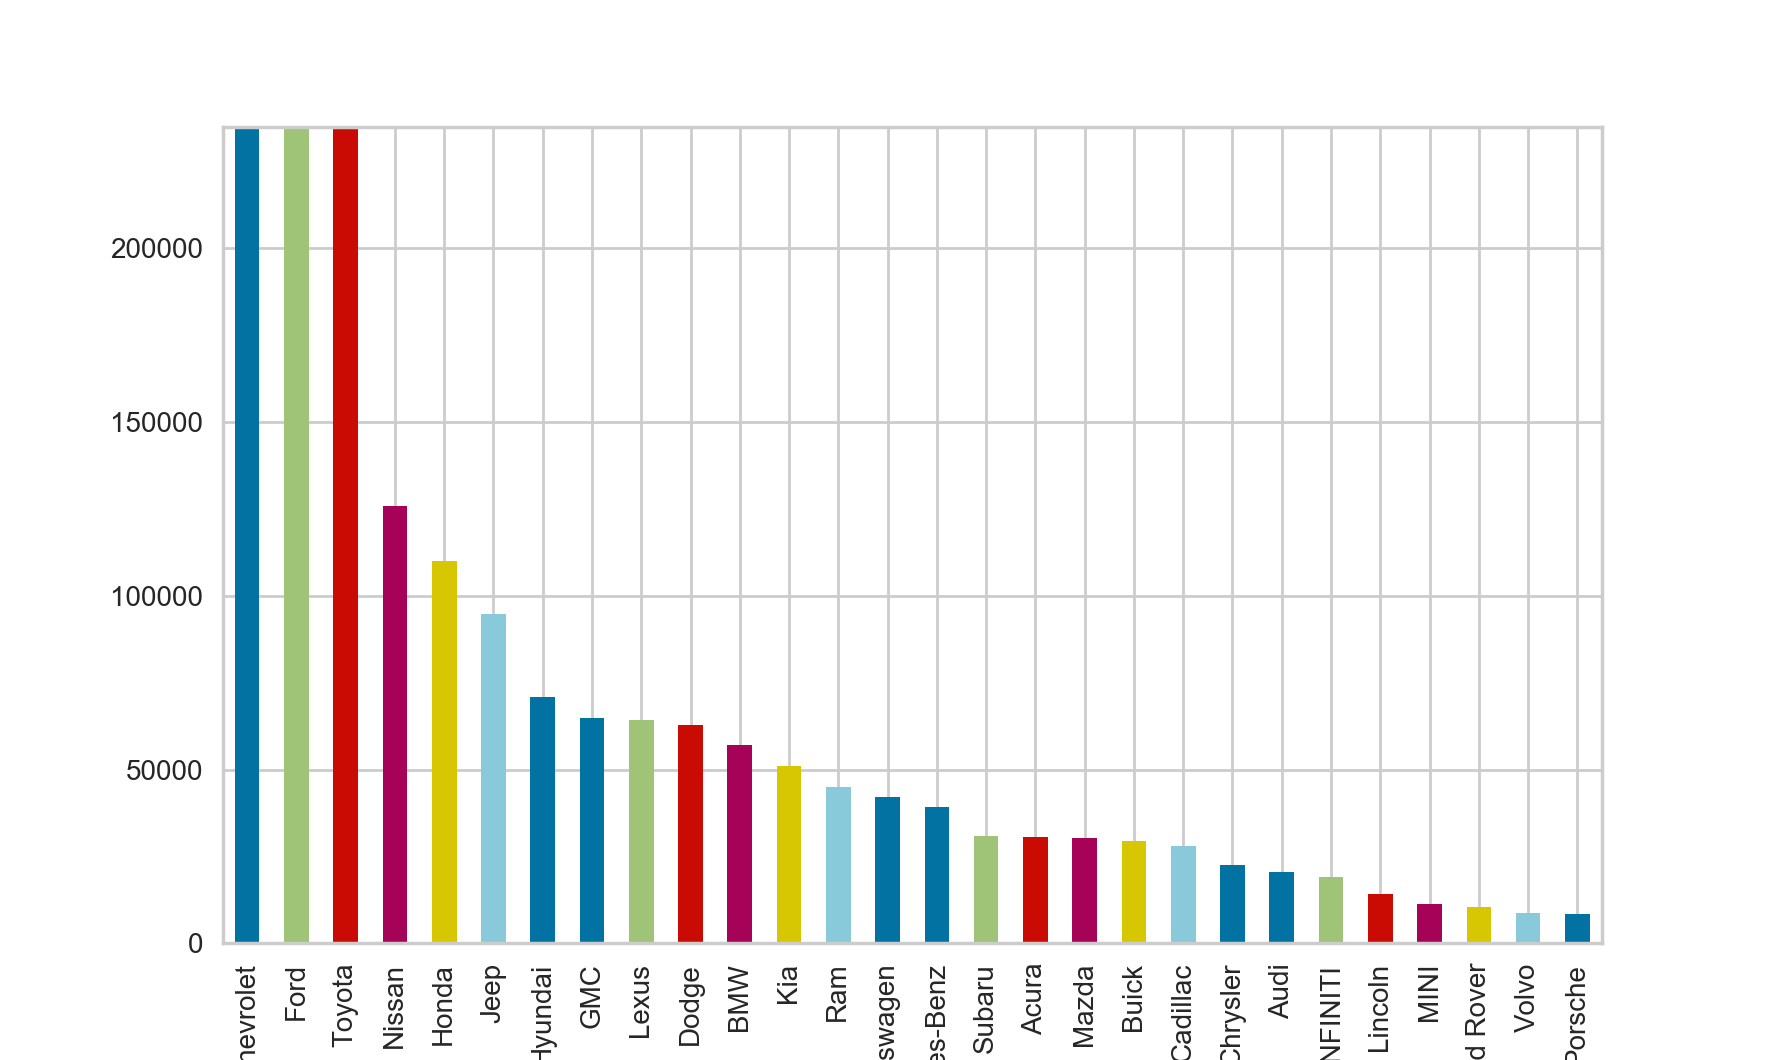

In [10]:
highincome['make'].value_counts().plot(kind='bar', figsize=(5,5))

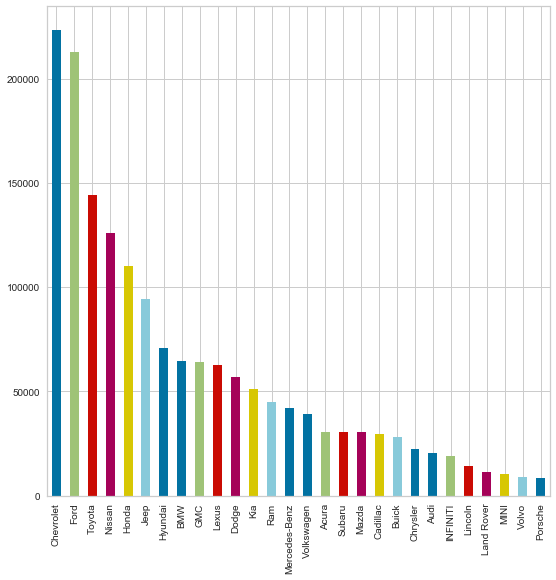

In [22]:
middleincome['make'].value_counts().plot(kind='bar', figsize=(9,9))

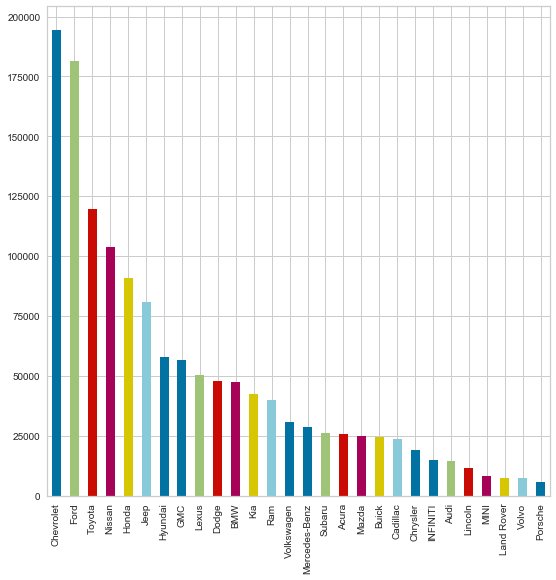

In [23]:
lowincome['make'].value_counts().plot(kind='bar', figsize=(9,9))

## Different level of household income - Body Type

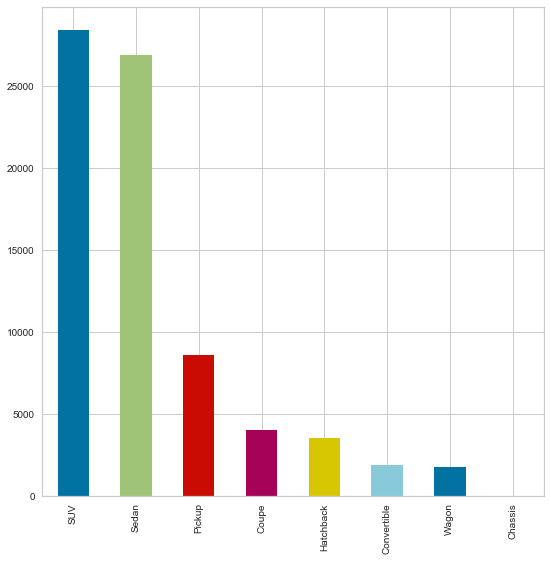

In [28]:
highincome['body_type'].value_counts().plot(kind='bar', figsize=(9,9))

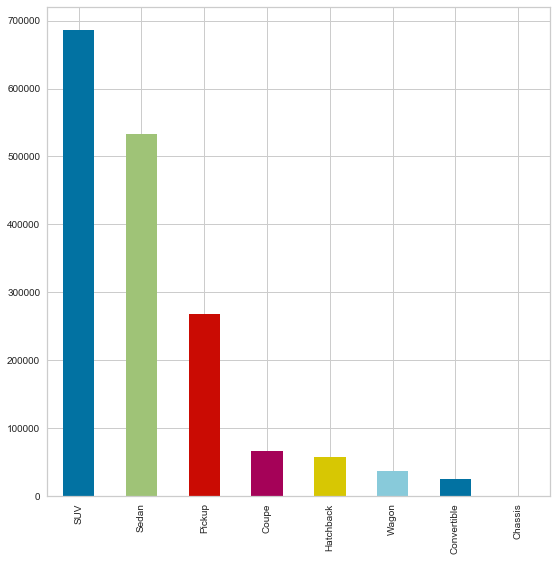

In [27]:
middleincome['body_type'].value_counts().plot(kind='bar', figsize=(9,9))

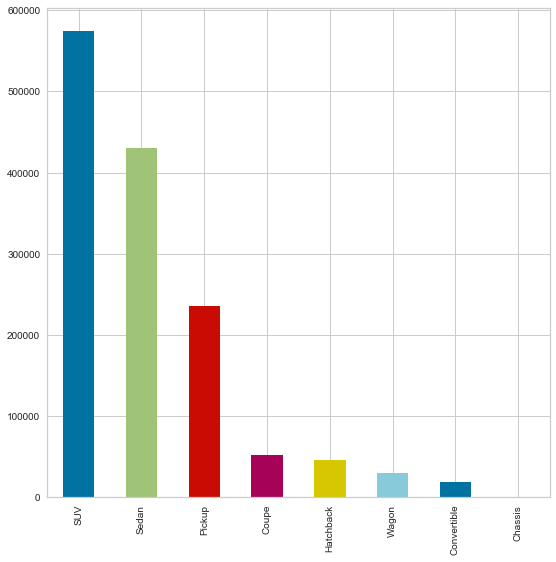

In [26]:
lowincome['body_type'].value_counts().plot(kind='bar', figsize=(9,9))

# Population

In [16]:
largepopulation = feature_df[feature_df['Population']>=1283122]
smallpolulation = feature_df[feature_df['Population']<1283122]

In [29]:
largepopulation['make'].value_counts().plot(kind='bar', figsize=(9,9))

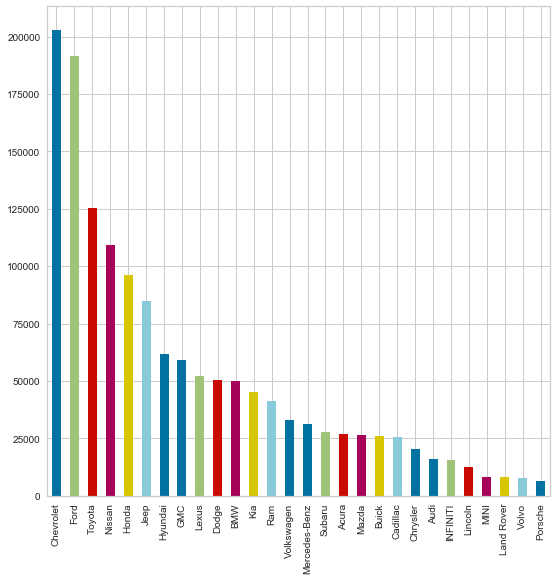

In [30]:
smallpolulation['make'].value_counts().plot(kind='bar', figsize=(9,9))

# States : Mean Price

In [35]:
statesmean = pd.DataFrame(feature_df.groupby('States Short').mean())
statesmean = statesmean.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

def us_map(z, scl, title, colorlabel):
    
    #This chunk allows you to apply labels to states, don't need it at the moment.
    #df['text'] = df['state'] + '<br>' +\
    #    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    #    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    #    'Wheat '+df['wheat']+' Corn '+df['corn']
    
    data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmean['States Short'],
        z = z, 
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = colorlabel)
        ) ]
    
    layout = dict(
        title = title,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
        
    fig = dict( data=data, layout=layout )
    ply.offline.iplot(fig, filename='d3-cloropleth-map')
    
us_map(statesmean['price'], scl, title="Mean Used Vehicle Prices in the US", colorlabel="USD")

/Users/goldbellconsulting-ddb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



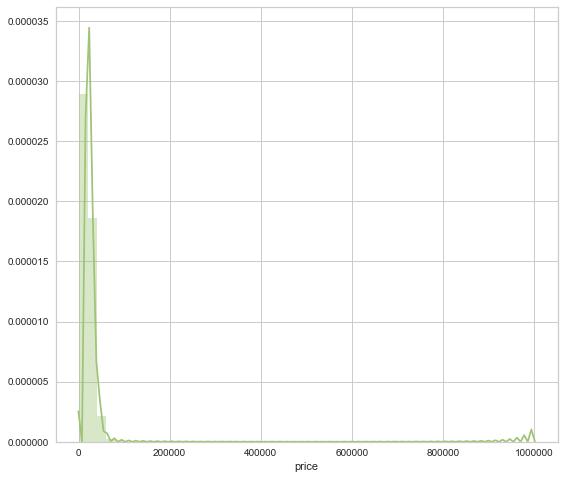

In [40]:
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=50)

# Decision to Drop Makes

In [41]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

/Users/goldbellconsulting-ddb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



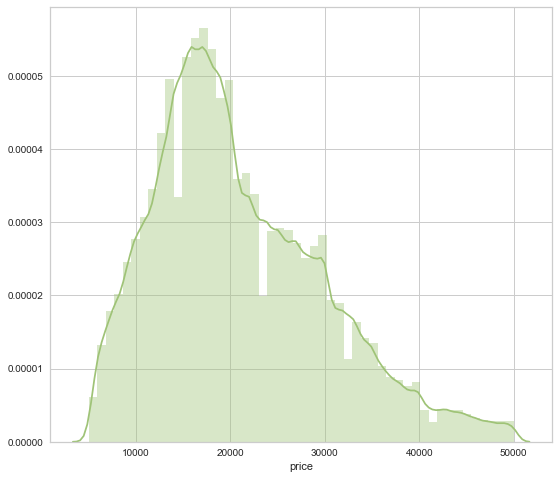

In [44]:
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=50)

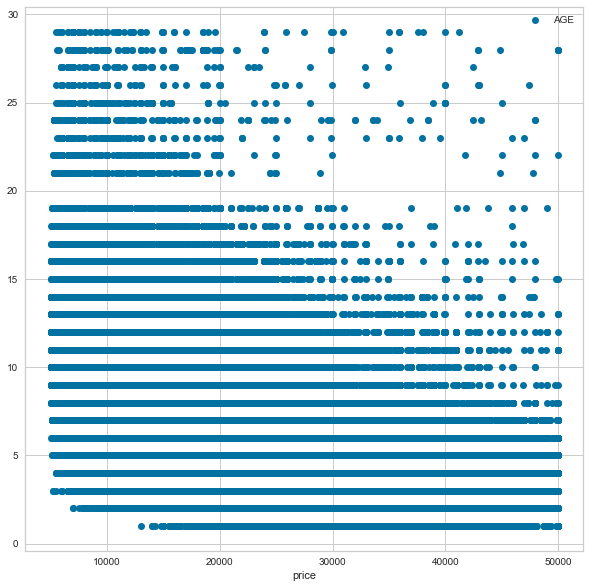

In [46]:
df.plot(x='price', y='AGE', style='o', figsize=(10,10))

In [49]:
df.boxplot(column="price", by="make", figsize=(25,10), showfliers=False)

# Car Prices by state

In [52]:
states = pd.DataFrame(df.groupby('States Short').mean())
states = States Short.reset_index()
statesmedian = pd.DataFrame(df.groupby('States Short').median())
statesmedian = States Shortmedian.reset_index()
states["median"] = States''Shortmedian['price']

SyntaxError: invalid syntax (<ipython-input-52-99d0c26e6c32>, line 2)

In [50]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 18))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="States Short", data=states, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="States Short", data=states, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,30000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

SyntaxError: invalid syntax (<ipython-input-50-37d5b72e2e5f>, line 1)

# Car Prices by Regions (Quads, Census, Ecomomic, Sun Belt, Frost Belt, Rust Belt)

In [89]:
df = pd.read_csv('car_data_clean_complete_v5_ext.csv')
df.columns

Index(['id', 'vin', 'price', 'miles', 'stock_no', 'year', 'make', 'model',
       'trim', 'vehicle_type', 'body_type', 'drivetrain', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'dom', 'dom_180', 'msrp', 'dom_active',
       'is_certified', 'fuel_type', 'scraped_at', 'status_date', 'AGE', 'zip',
       'type', 'decommissioned', 'primary_city', 'county', 'timezone',
       'latitude', 'longitude', 'irs_estimated_population_2015', 'Population',
       'Number_of_households', 'Median_Household_income_num',
       'Median_Family_income_num', 'Per_Capita_income_Num', 'States_Short',
       'Regions_Quads', 'Regions_Census', 'Regions_Economic', 'Frost_Belt',
       'Rust_Belt', 'Sun_Belt'],
      dtype='object')

In [90]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

In [62]:
regions_rq = pd.DataFrame(df.groupby('Regions_Quads').mean())
regions_rq = regions_rq.reset_index()
regions_rqmedian = pd.DataFrame(df.groupby('Regions_Quads').median())
regions_rqmedian = regions_rqmedian.reset_index()
regions_rq["median"] = regions_rqmedian['price']

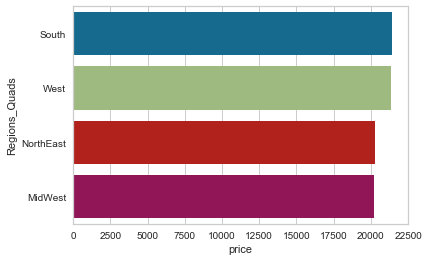

In [65]:
regions_rq.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="Regions_Quads", data=regions_rq, label="Mean")

In [66]:
regions_rc = pd.DataFrame(df.groupby('Regions_Census').mean())
regions_rc = regions_rc.reset_index()
regions_rcmedian = pd.DataFrame(df.groupby('Regions_Census').median())
regions_rcmedian = regions_rcmedian.reset_index()
regions_rc["median"] = regions_rcmedian['price']

In [68]:
regions_rc.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="Regions_Census", data=regions_rc, label="Mean")

In [69]:
regions_re = pd.DataFrame(df.groupby('Regions_Economic').mean())
regions_re = regions_re.reset_index()
regions_remedian = pd.DataFrame(df.groupby('Regions_Economic').median())
regions_remedian = regions_remedian.reset_index()
regions_re["median"] = regions_remedian['price']

In [70]:
regions_re.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="Regions_Economic", data=regions_re, label="Mean")

In [71]:
regions_sb = pd.DataFrame(df.groupby('Sun_Belt').mean())
regions_sb = regions_sb.reset_index()
regions_sbmedian = pd.DataFrame(df.groupby('Sun_Belt').median())
regions_sbmedian = regions_sbmedian.reset_index()
regions_sb["median"] = regions_sbmedian['price']

In [73]:
regions_sb.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="Sun_Belt", data=regions_sb, label="Mean")

In [84]:
regions_fb = pd.DataFrame(df.groupby('Frost_Belt').mean())
regions_fb = regions_fb.reset_index()
regions_fbmedian = pd.DataFrame(df.groupby('Frost_Belt').median())
regions_fbmedian = regions_fbmedian.reset_index()
regions_fb["median"] = regions_fbmedian['price']

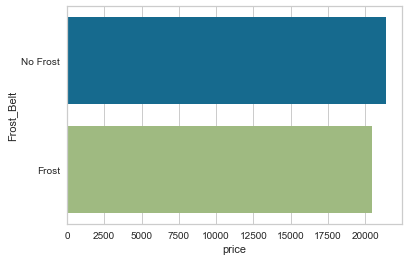

In [85]:
regions_fb.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="Frost_Belt", data=regions_fb, label="Mean")

In [91]:
regions_rb = pd.DataFrame(df.groupby('Rust_Belt').mean())
regions_rb = regions_rb.reset_index()
regions_rbmedian = pd.DataFrame(df.groupby('Rust_Belt').median())
regions_rbmedian = regions_rbmedian.reset_index()
regions_rb["median"] = regions_rbmedian['price']

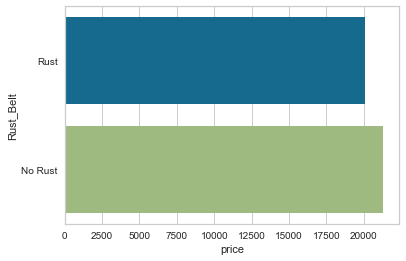

In [92]:
regions_rb.sort_values('Rust_Belt', ascending=False, inplace=True)
sns.barplot(x="price", y="Rust_Belt", data=regions_rb, label="Mean")

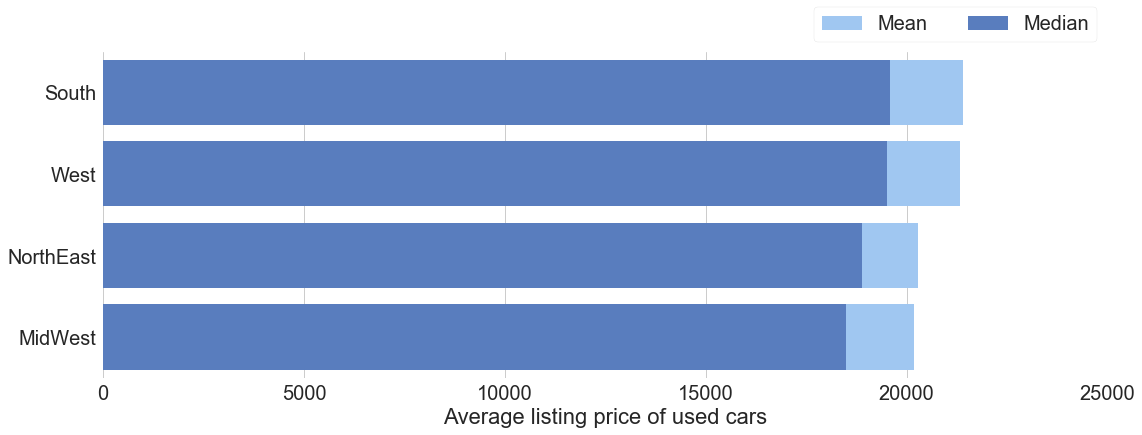

In [94]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Regions_Quads", data=regions_rq, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Regions_Quads", data=regions_rq, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

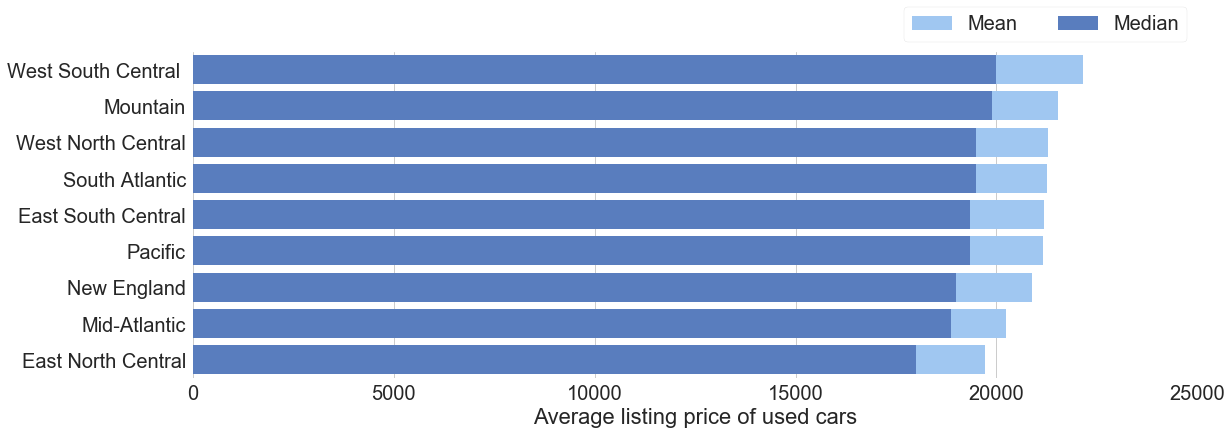

In [106]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Regions_Census", data=regions_rc, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Regions_Census", data=regions_rc, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

In [107]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Regions_Economic", data=regions_re, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Regions_Economic", data=regions_re, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

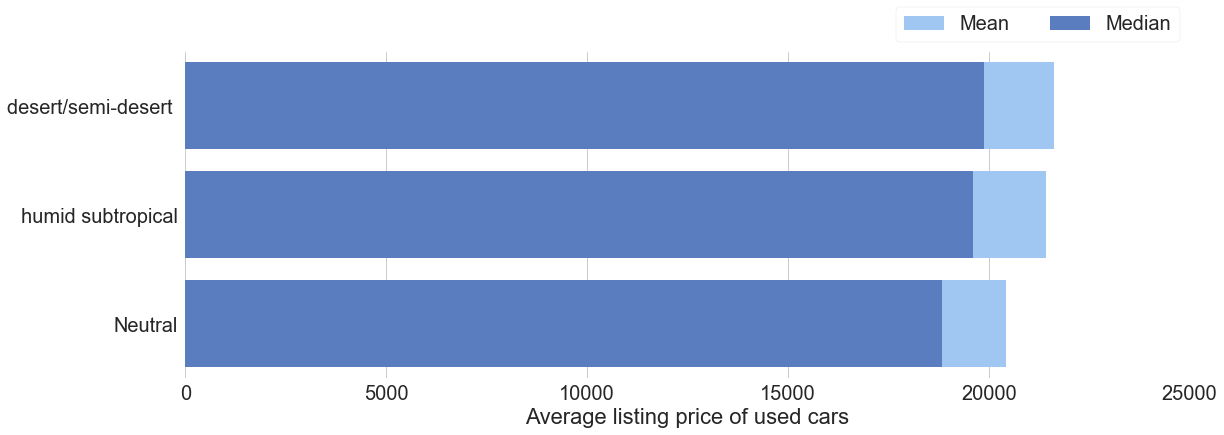

In [108]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Sun_Belt", data=regions_sb, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Sun_Belt", data=regions_sb, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

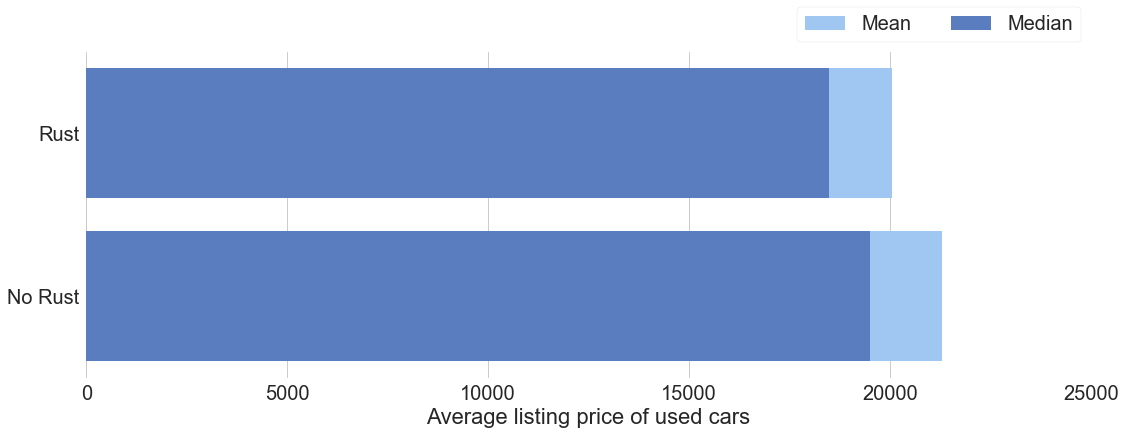

In [109]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Rust_Belt", data=regions_rb, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Rust_Belt", data=regions_rb, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

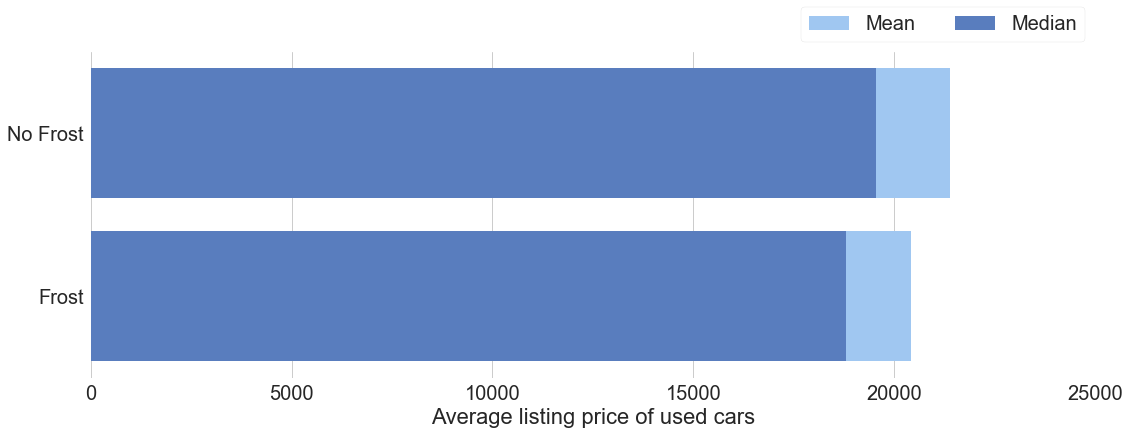

In [110]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="Frost_Belt", data=regions_fb, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Frost_Belt", data=regions_fb, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

In [95]:
chevy = df[(df["make"] == "Chevrolet")]
chevy = pd.DataFrame(chevy.groupby('States_Short').median())
chevy = chevy.reset_index()

ford = df[(df["make"] == "Ford")]
ford = pd.DataFrame(ford.groupby('States_Short').median())
ford = ford.reset_index()

toyota = df[(df["make"] == "Toyota")]
toyota = pd.DataFrame(toyota.groupby('States_Short').median())
toyota = toyota.reset_index()

nissan = df[(df["make"] == "Nissan")]
nissan = pd.DataFrame(nissan.groupby('States_Short').median())
nissan = nissan.reset_index()

honda = df[(df["make"] == "Honda")]
honda = pd.DataFrame(honda.groupby('States_Short').median())
honda = honda.reset_index()

## Chevy Median price by State

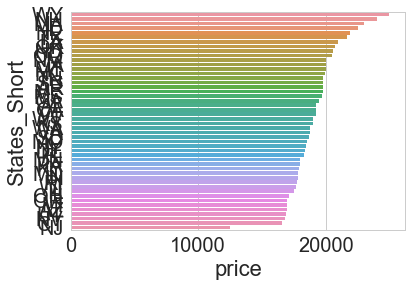

In [96]:
chevy.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=chevy, label="Median")

## Ford Median price by State

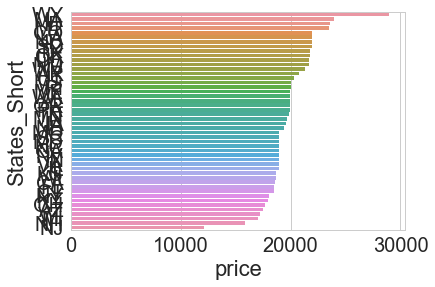

In [98]:
ford.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=ford, label="Median")

## Toyota Median price by State

In [101]:
toyota.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=toyota, label="Median")

## Nissan Median price by State

In [102]:
nissan.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=toyota, label="Median")

## Honda Median price by State

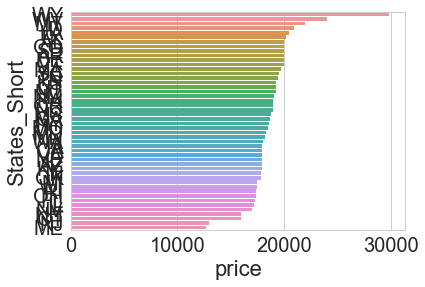

In [103]:
honda.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=toyota, label="Median")

## Vehicle counts by State broken in Types

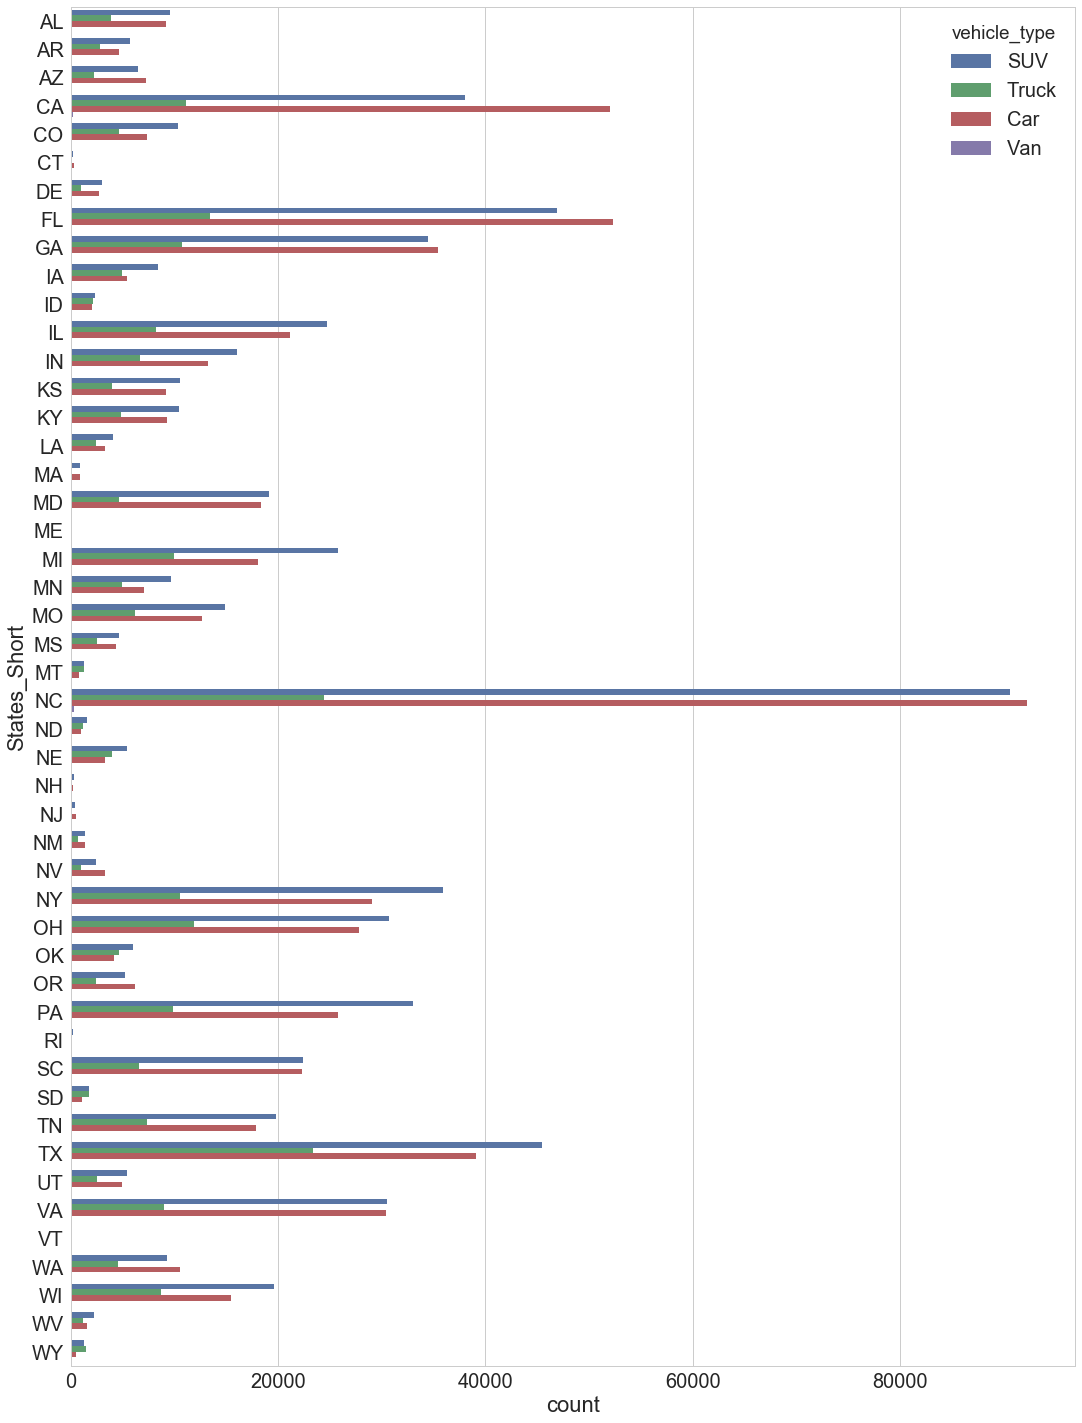

In [104]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 25))
vehiclecount = df.sort_values('States_Short', ascending=True, inplace=False)
sns.countplot(y="States_Short", hue="vehicle_type", data=vehiclecount)

## Vehicle counts by State broken in Types

In [113]:
df = pd.read_csv('car_data_clean_complete_v5_ext.csv')
df.columns

Index(['id', 'vin', 'price', 'miles', 'stock_no', 'year', 'make', 'model',
       'trim', 'vehicle_type', 'body_type', 'drivetrain', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'dom', 'dom_180', 'msrp', 'dom_active',
       'is_certified', 'fuel_type', 'scraped_at', 'status_date', 'AGE', 'zip',
       'type', 'decommissioned', 'primary_city', 'county', 'timezone',
       'latitude', 'longitude', 'irs_estimated_population_2015', 'Population',
       'Number_of_households', 'Median_Household_income_num',
       'Median_Family_income_num', 'Per_Capita_income_Num', 'States_Short',
       'Regions_Quads', 'Regions_Census', 'Regions_Economic', 'Frost_Belt',
       'Rust_Belt', 'Sun_Belt'],
      dtype='object')

In [114]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

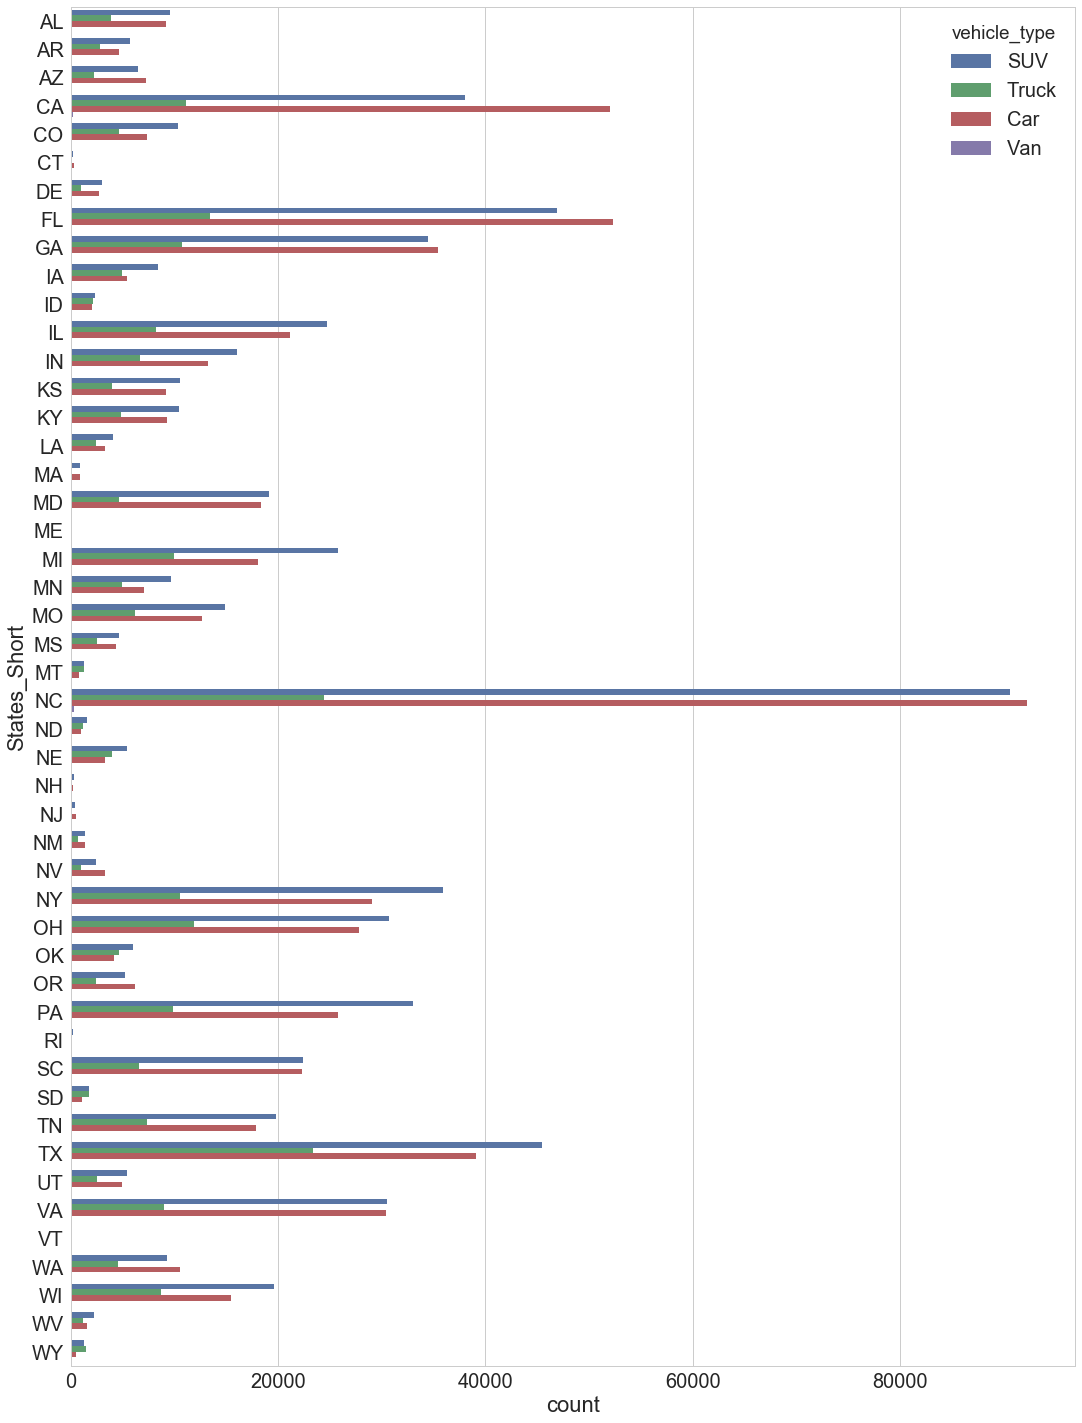

In [115]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 25))
vehiclecount = df.sort_values('States_Short', ascending=True, inplace=False)
sns.countplot(y="States_Short", hue="vehicle_type", data=vehiclecount)

In [116]:
sns.set(font_scale=2, rc={'figure.figsize':(18, 18)})

suv = df[(df["vehicle_type"] == "SUV")]
suv = pd.DataFrame(suv.groupby('States_Short').median())
suv = suv.reset_index()

car = df[(df["vehicle_type"] == "Car")]
car = pd.DataFrame(car.groupby('States_Short').median())
car = car.reset_index()

truck = df[(df["vehicle_type"] == "Truck")]
truck = pd.DataFrame(truck.groupby('States_Short').median())
truck = truck.reset_index()

van = df[(df["vehicle_type"] == "Van")]
van = pd.DataFrame(van.groupby('States_Short').median())
van = van.reset_index()

## SUV Median price by State

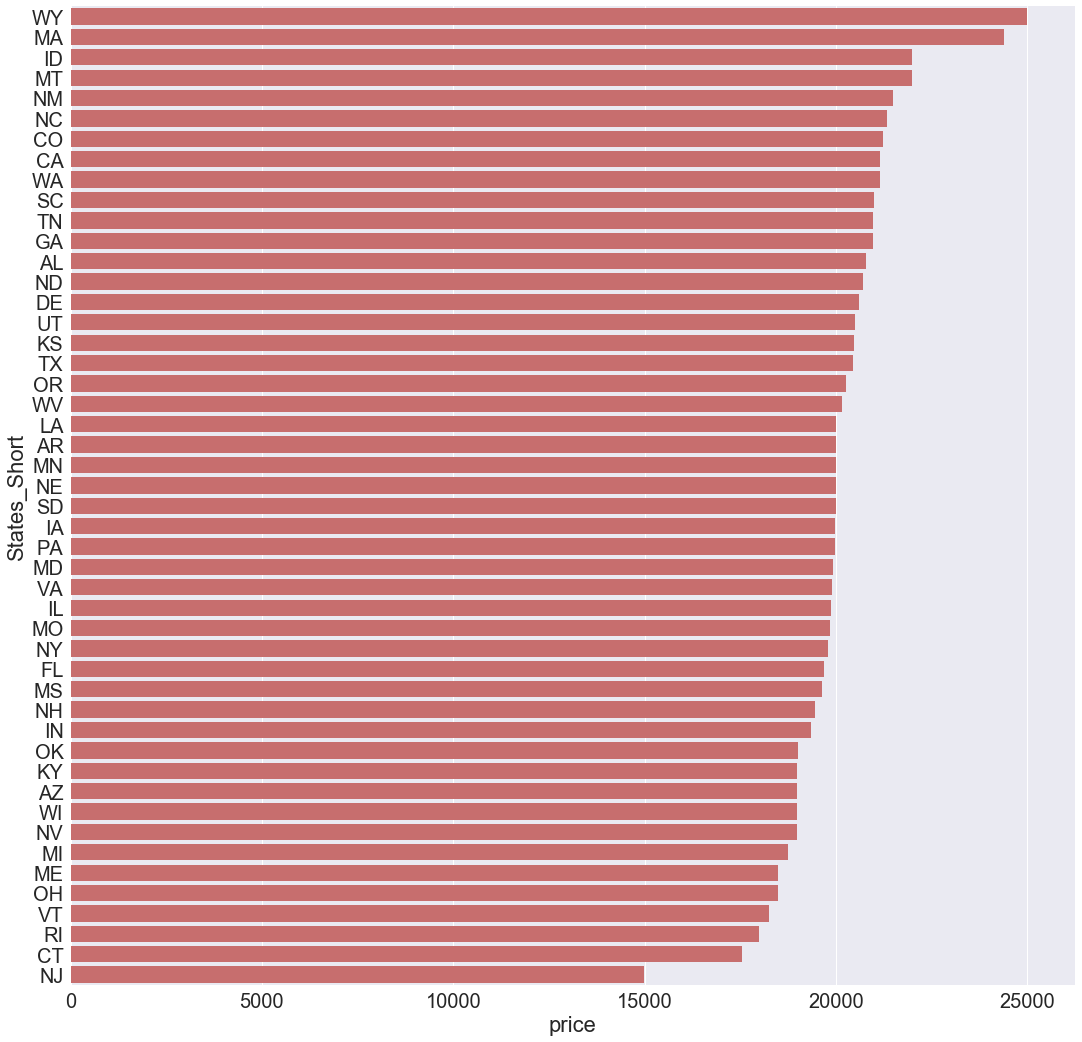

In [117]:
sns.set_color_codes("muted")
suv.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=suv, label="Median", color="r")

## Car Median price by State

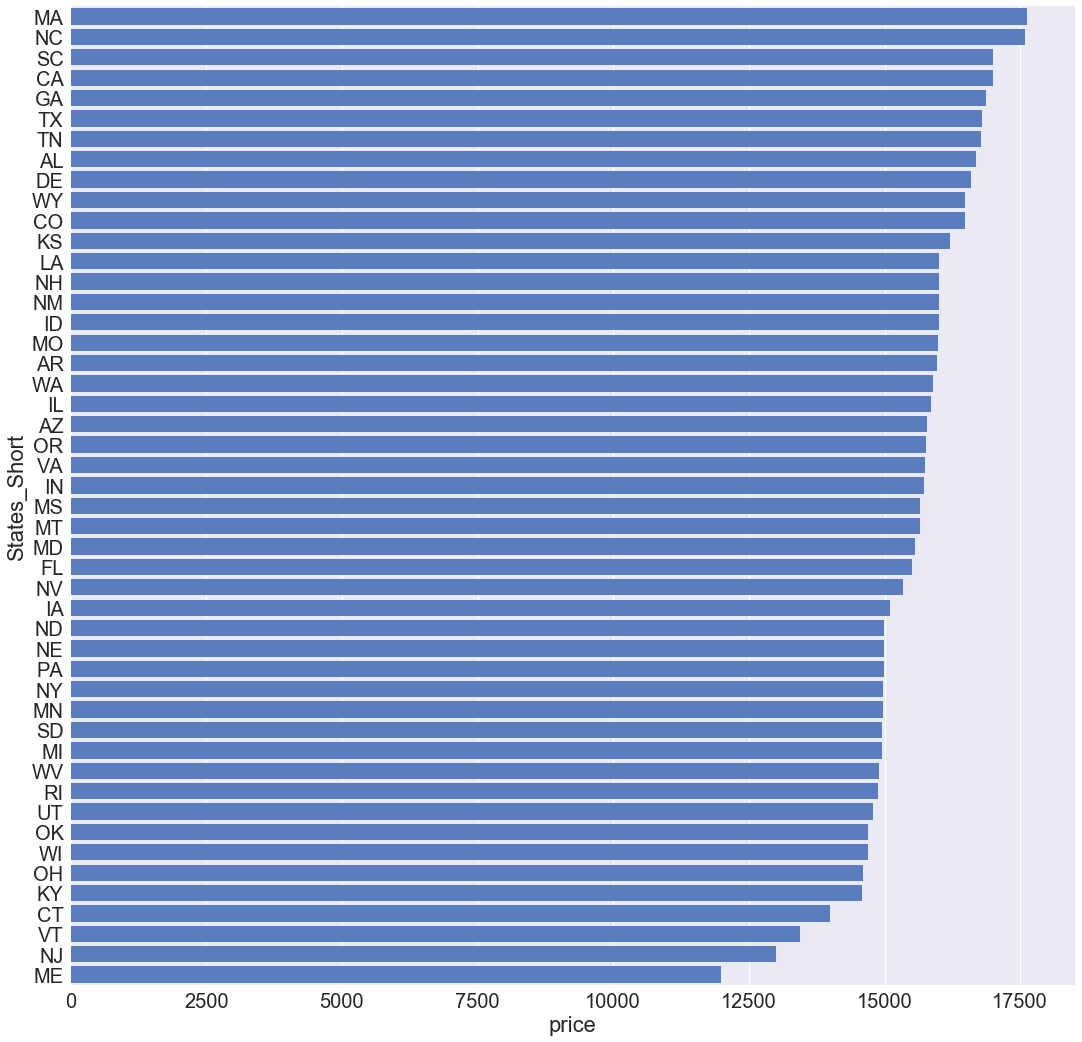

In [119]:
car.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=car, label="Median", color="b")

## Truck Median price by State

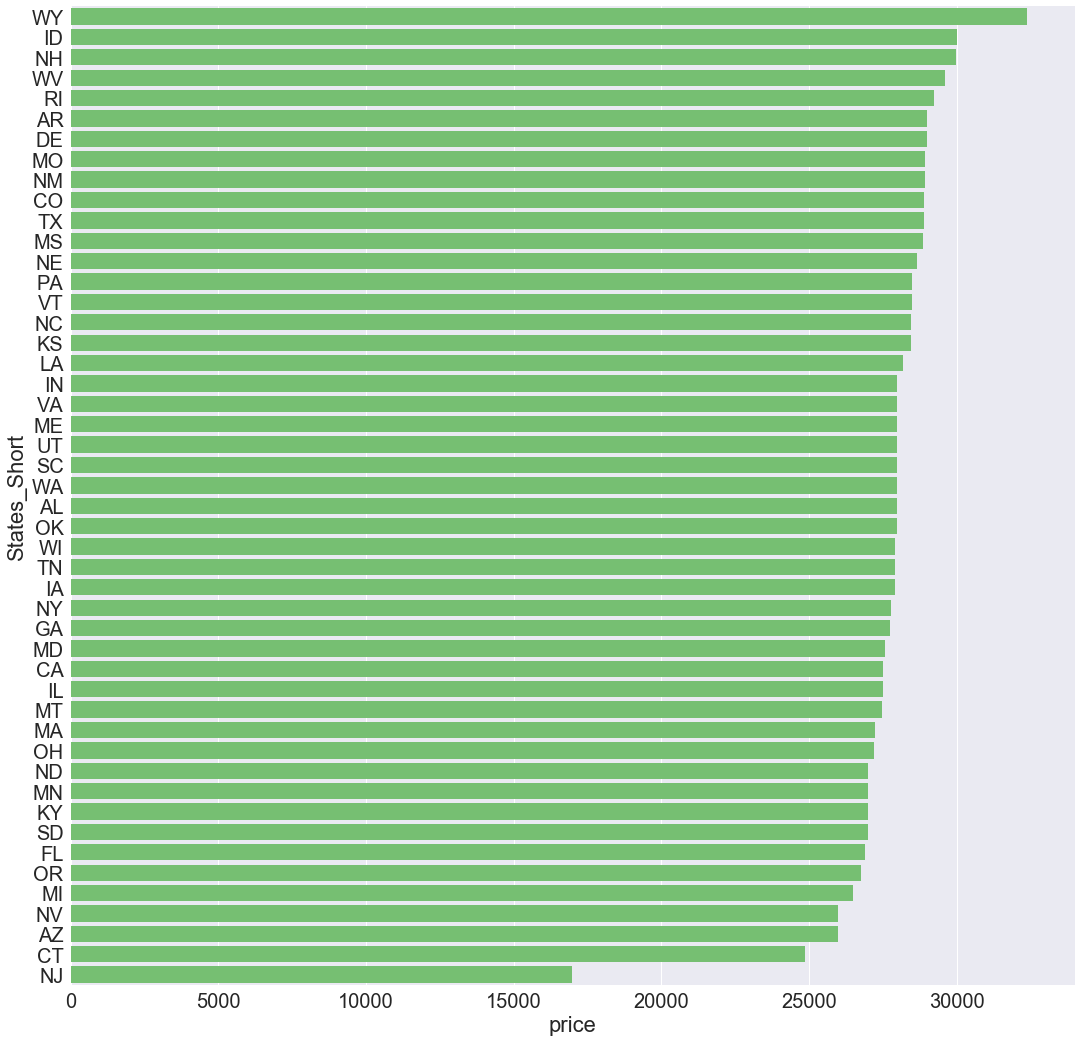

In [120]:
truck.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=truck, label="Median", color="g")

## Van Median price by State

In [121]:
van.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=van, label="Median", color="m")

## Heatmap of Median price of State and Make

In [122]:
statemake = pd.DataFrame(df.groupby(['States_Short', 'make']).mean())
statemake = statemake.reset_index()

sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("States_Short", "make", "price")
sns.heatmap(heaty, cmap="PiYG")#center=heaty.loc["Alabama", "Acura"])

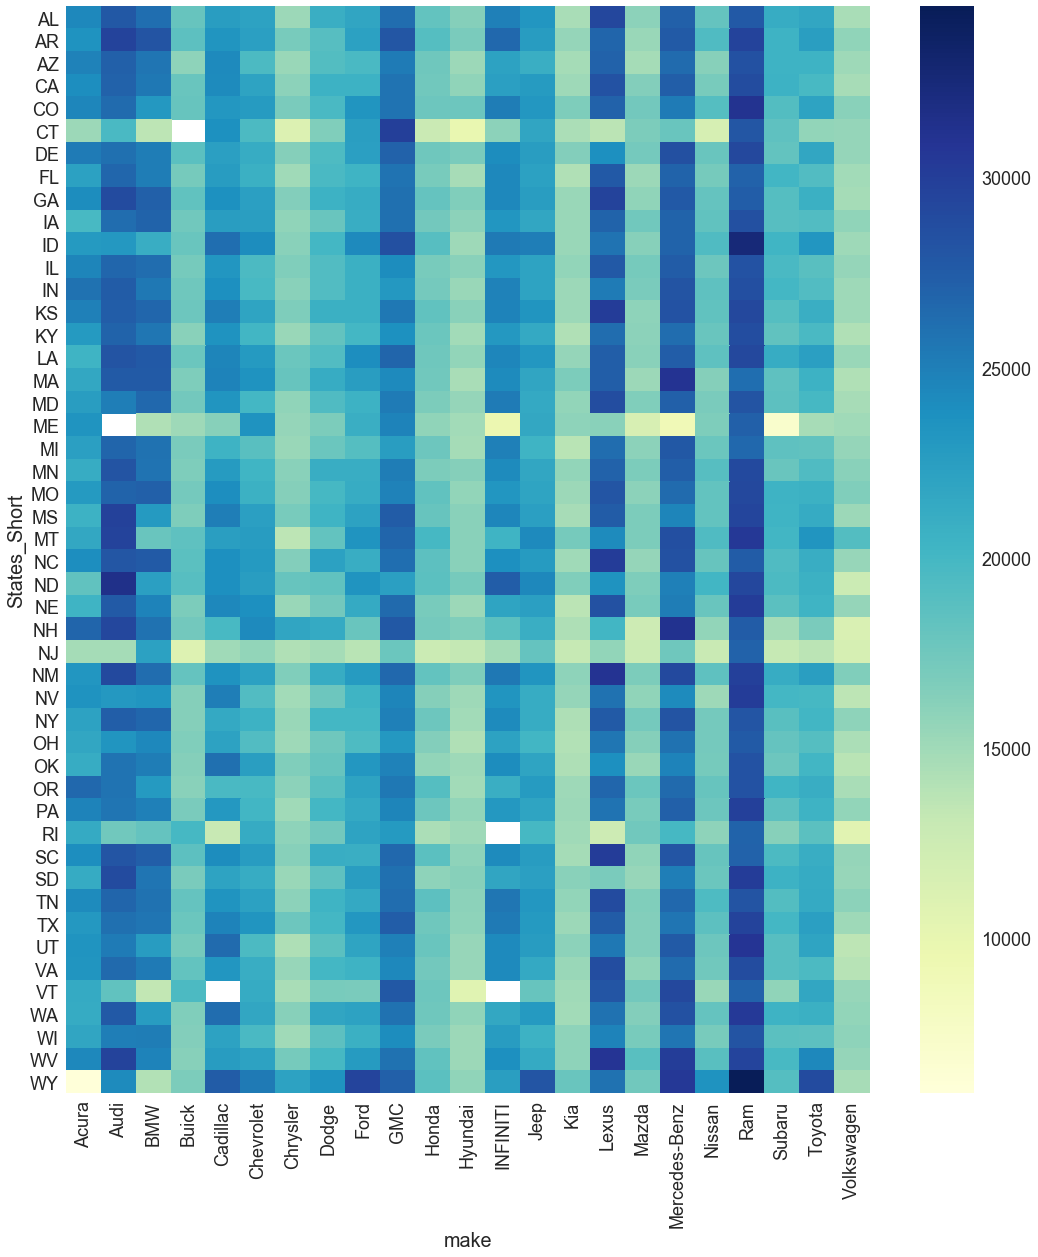

In [123]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 20))
heaty = statemake.pivot("States_Short", "make", "price")
sns.heatmap(heaty, cmap="YlGnBu")

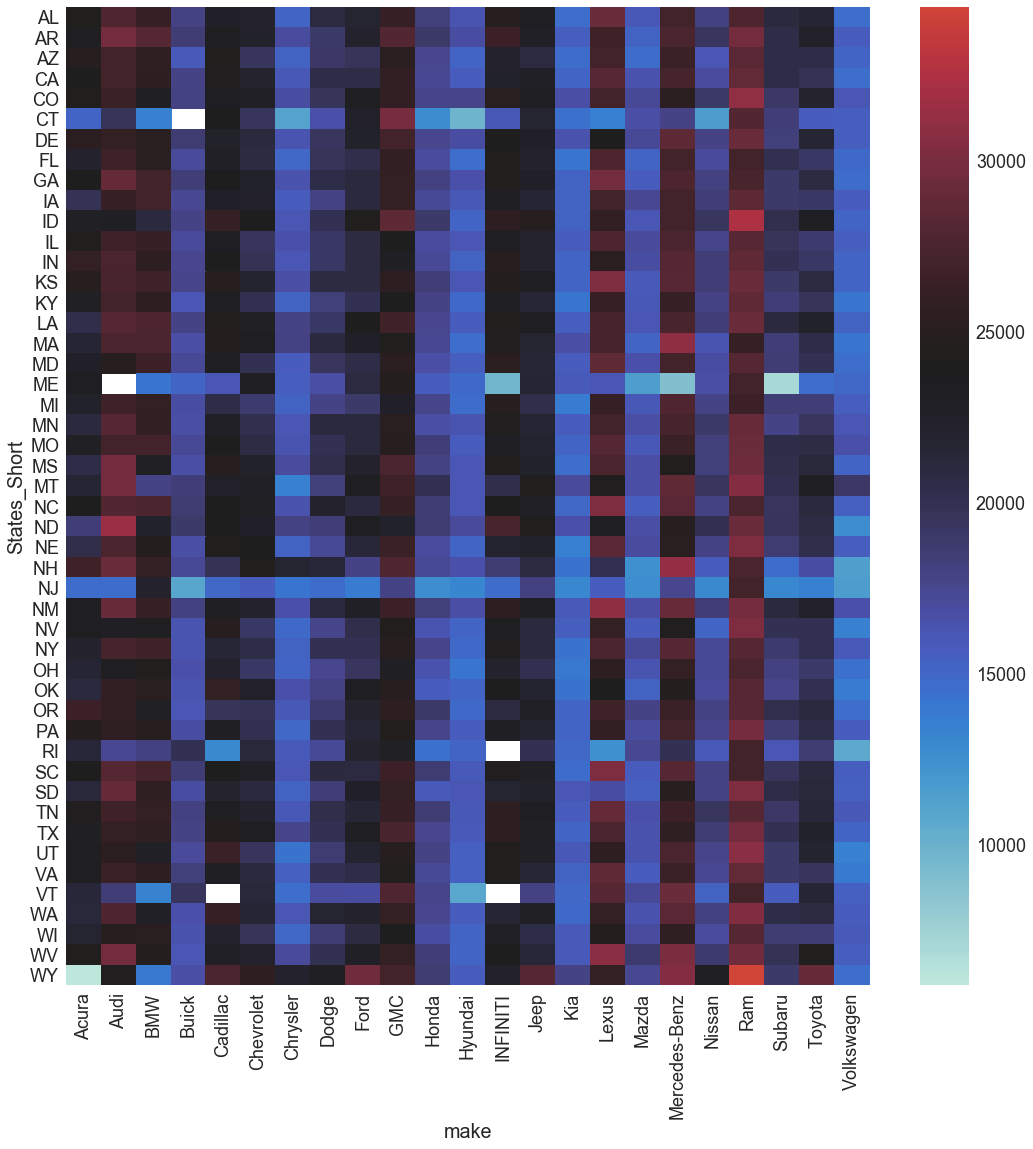

In [124]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("States_Short", "make", "price")
sns.heatmap(heaty, center=24000)

## The most popular vehicle, an analysis

In [113]:
df = pd.read_csv('car_data_clean_complete_v5_ext.csv')
df.columns

Index(['id', 'vin', 'price', 'miles', 'stock_no', 'year', 'make', 'model',
       'trim', 'vehicle_type', 'body_type', 'drivetrain', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'dom', 'dom_180', 'msrp', 'dom_active',
       'is_certified', 'fuel_type', 'scraped_at', 'status_date', 'AGE', 'zip',
       'type', 'decommissioned', 'primary_city', 'county', 'timezone',
       'latitude', 'longitude', 'irs_estimated_population_2015', 'Population',
       'Number_of_households', 'Median_Household_income_num',
       'Median_Family_income_num', 'Per_Capita_income_Num', 'States_Short',
       'Regions_Quads', 'Regions_Census', 'Regions_Economic', 'Frost_Belt',
       'Rust_Belt', 'Sun_Belt'],
      dtype='object')

In [114]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

In [125]:
mostpopcar = df[(df["model"] == "Silverado 1500")]
mostpoptruck = df[(df["model"] == "F-150")]

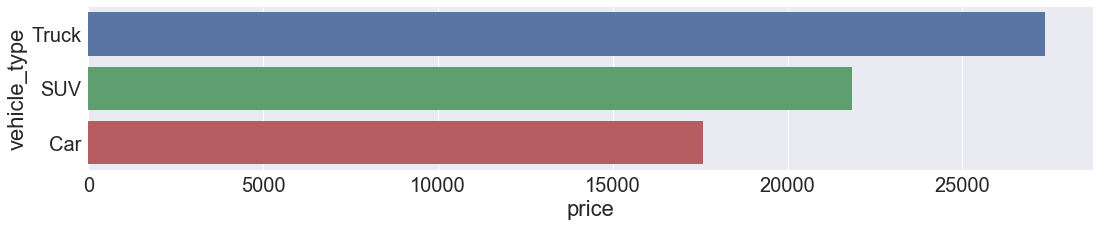

In [126]:
vtypes = pd.DataFrame(df.groupby('vehicle_type').mean())
vtypes = vtypes.reset_index()
vtypes = vtypes.drop(vtypes[vtypes["vehicle_type"] == "Multipurpose Passenger Vehicle (Mpv)"].index | vtypes[vtypes["vehicle_type"] == "Van"].index)
vtypes.sort_values('price', ascending=False, inplace=True)
sns.set(font_scale=2, rc={'figure.figsize':(18, 3)})
sns.barplot(x="price", y="vehicle_type", data=vtypes, label="Median")

In [127]:
mostpopcar["year"].value_counts().sort_values(ascending = False)

2015    14577
2016     9237
2014     7564
2017     7057
2013     3986
2011     2845
2012     2566
2010     1262
2009     1214
2008     1115
2007      754
2006      645
2005      516
2004      338
2003      183
2002       99
2001       62
2000       60
Name: year, dtype: int64

In [128]:
mostpoptruck["year"].value_counts().sort_values(ascending = False)

2015    13676
2016    12913
2014     8578
2013     6024
2012     2667
2011     2189
2010     1991
2017     1397
2007      879
2009      836
2008      832
2006      644
2004      463
2005      443
2003      234
2018      204
2002      146
2001      136
2000       40
1997       19
1998       16
1996        3
1994        3
1992        3
1991        2
1995        1
Name: year, dtype: int64

In [129]:
mostpopcar = mostpopcar[(mostpopcar["year"] == 2015.0)]

In [130]:
mostpoptruck = mostpoptruck[(mostpoptruck["year"] == 2015.0)]

In [131]:
mostpopcar["year"].value_counts().sort_values(ascending = False)

2015    14577
Name: year, dtype: int64

In [132]:
df["model"].value_counts().sort_values(ascending = False)

F-150                  54339
Silverado 1500         54080
1500                   36597
CR-V                   32496
Altima                 32258
Equinox                32128
Wrangler               31946
Escape                 30777
Accord                 30523
Camry                  25645
Civic                  22895
Grand Cherokee         22206
Explorer               21655
Rogue                  21213
Sonata                 20769
3 Series               20587
Fusion                 19823
Sierra 1500            19390
RAV4                   19382
Edge                   17615
Tacoma                 17391
Malibu                 17273
Corolla                17239
Cherokee               16433
RX 350                 15591
Sorento                14898
Cruze                  14870
Highlander             14210
Tahoe                  13926
Traverse               13524
                       ...  
MR2                        1
Lumina                     1
SIERRA                     1
RAM Charger   

In [134]:
accord = df[(df["model"] == "Accord")]
accord = accord[(accord["year"] == 2016.0)]

accord = pd.DataFrame(accord.groupby('States_Short').mean())
accord = accord.reset_index()

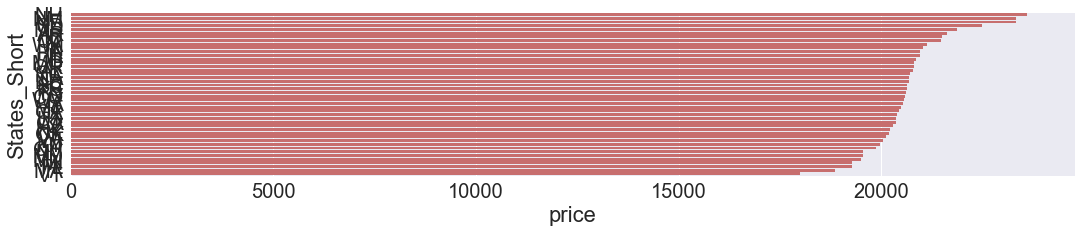

In [135]:
sns.set_color_codes("muted")
accord.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="States_Short", data=accord, label="Median", color="r")

In [136]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = mostpoptruckmean['state'],
        z = mostpoptruckmean['msrp'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean MSRP of used F-150 listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
ply.offline.iplot(fig, filename='d3-cloropleth-map')

NameError: name 'mostpoptruckmean' is not defined

In [137]:
nc = df[(df["States_Short"] == "NC")]
nc["States_Short"].value_counts().sort_values(ascending = False)

NC    207640
Name: States_Short, dtype: int64

In [138]:
df["States_Short"].value_counts().sort_values(ascending = False)

NC    207640
FL    112777
TX    108032
CA    101425
GA     80839
NY     75624
OH     70621
VA     70056
PA     68775
IL     54255
MI     53869
SC     51431
TN     45082
WI     43961
MD     42255
IN     36130
MO     33787
KY     24599
WA     24437
KS     23775
AL     22705
CO     22470
MN     21772
IA     18784
AZ     16125
OK     14815
OR     13961
AR     13228
UT     12940
NE     12705
MS     11680
LA      9820
NV      6866
DE      6803
ID      6612
WV      5094
SD      4641
ND      3844
NM      3542
MT      3389
WY      3253
MA      1912
NJ      1008
NH       600
CT       585
RI       471
VT       327
ME       324
Name: States_Short, dtype: int64

In [140]:
crv = df[(df["model"] == "CR-V")]
crv = crv[(crv["year"] == 2015.0)]
crv = pd.DataFrame(mostpopcar.groupby('States_Short').mean())
crv = crv.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
#scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
#            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = crv['States_Short'],
        z = crv['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used CR-V listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
ply.offline.iplot(fig, filename='d3-cloropleth-map')

In [ ]:
# Correlations

In [141]:
df = pd.read_csv('car_data_clean_complete_v5_ext.csv')
df.columns

df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)

expcars = (df['price'] > 5000) & (df['price'] < 50000)
df = df[expcars]

In [142]:
labels = ['make', 'model', 'trim', 'interior_color', 'exterior_color', 'zip', 'fuel_type', 
          'States_Short', 'stock_no', 'vehicle_type', 'body_type', 'drivetrain', 'engine', 'transmission', 'primary_city',
         'county', 'timezone', 'Regions_Quads', 'Regions_Census', 'Regions_Economic', 'Sun_Belt', 'Frost_Belt', 'Rust_Belt']
les = {}

for l in labels:
    les[l] = LabelEncoder()
    les[l].fit(df[l].astype(str))
    tr = les[l].transform(df[l].astype(str))
    
    df.loc[:, l + '_feat'] = pd.Series(tr, index=df.index)

labeled = df[['price','miles','year', 'cylinders','msrp','is_certified','engine_size',
              'AGE','Population', 'doors', 'dom', 'dom_180', 'dom_active', 'irs_estimated_population_2015',
              'Median_Household_income_num','Number_of_households', 'Median_Family_income_num', 'Per_Capita_income_Num',] 
                    + [x+"_feat" for x in labels]]

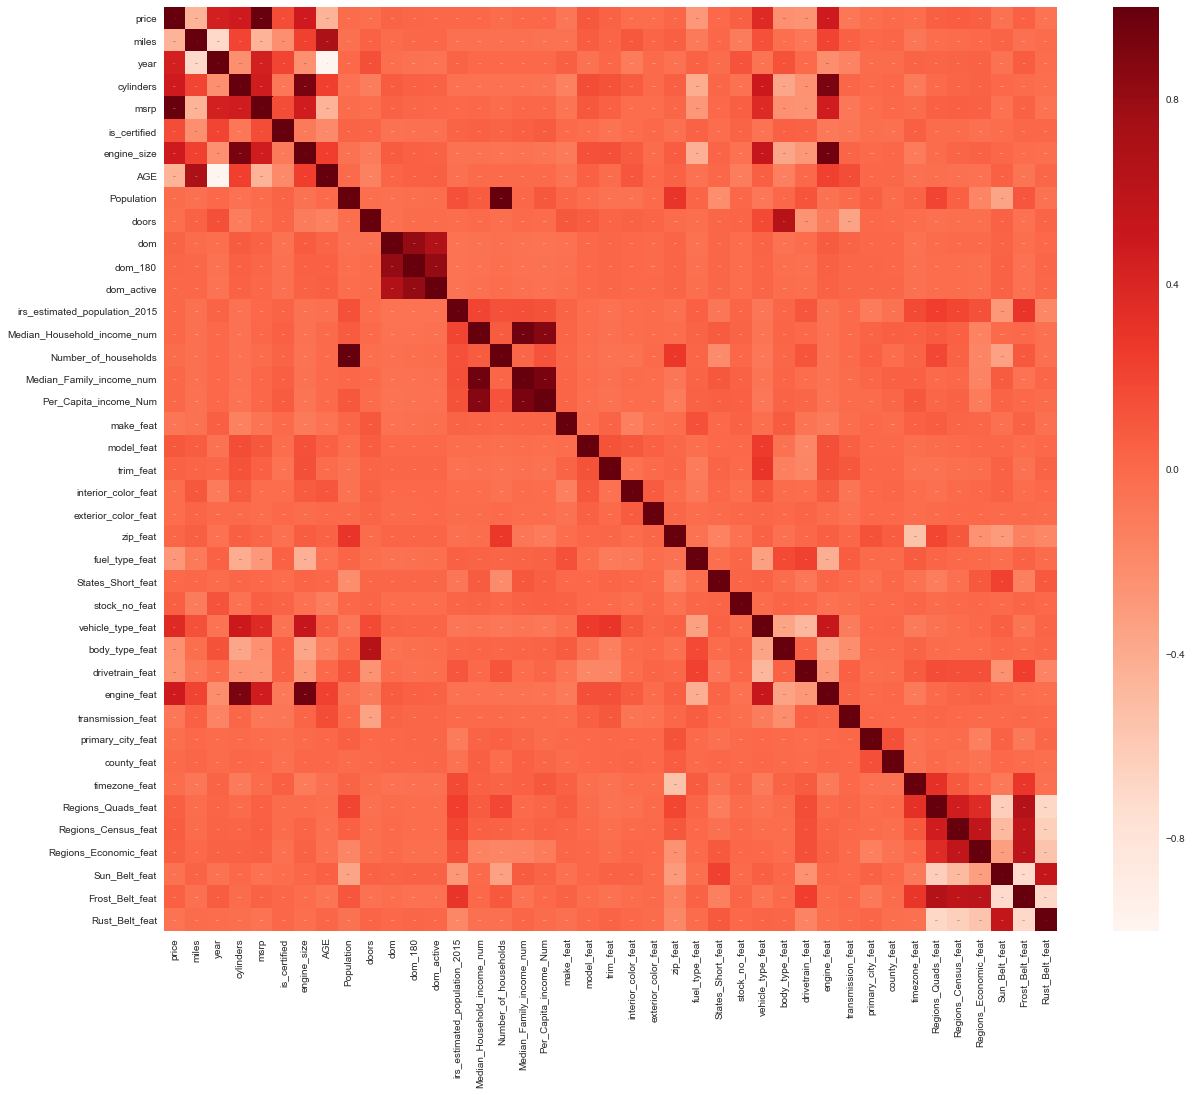

In [147]:
corr = labeled.corr(method='pearson')
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corr, annot = True, fmt =".5g", annot_kws={"size": 1}, cmap = "Reds")